# datos
se importa desde github el archivo con 5000 comentarios y su clasificación como positivas o negativos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

# Clonar el repositorio de GitHub
!git clone https://github.com/norvey2019/Report.git

# Navegar al directorio del repositorio clonado
%cd Report

# Verificar el contenido del directorio
print("Contenido del directorio clonado:")
print(os.listdir("."))

# Ruta (dentro del repositorio clonado) se toma el archivo https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 5000 comentarios
# para ser cargados en el github
ruta = 'comentarios 5k.xlsx'
df = pd.read_excel(ruta)


Cloning into 'Report'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 2.89 MiB | 22.77 MiB/s, done.
/content/Report
Contenido del directorio clonado:
['.git', 'comentarios 5k.xlsx']


In [ ]:
print(df.tail())

                                                 review sentiment
4995  Music videos are often completely disregarded ...  positive
4996  If you went to this movie to see some huge aca...  positive
4997  I totally disagree with the other reviews.All ...  positive
4998  A blockbuster at the time of it's original rel...  positive
4999  I had never seen such an incredible acting job...  positive


##librerias
se importa las blibliotecas y las  librerias de  tokenización, ademas de la metricas de machine learning

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [ ]:
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Renombramos las columnas mediante .columns de pandas
df.columns = ['texto','sentimiento']

# visualizar últimos registros del dataset mediante .tail de pandas
print(df.head())

                                               texto sentimiento
0  Basically there's a family where a little boy ...    negative
1  This show was an amazing, fresh & innovative i...    negative
2  Encouraged by the positive comments about this...    negative
3  Phil the Alien is one of those quirky films wh...    negative
4  I saw this movie when I was about 12 when it c...    negative


In [ ]:
# se verifica la dimensión de dataframe y se imprime algunos de los comentarios para analizar el tipo de caracteres vacios
print("Dimensión del dataset:", df.shape)
df['texto'][10]

Dimensión del dataset: (5000, 2)


'I had the terrible misfortune of having to view this "b-movie" in it\'s entirety.<br /><br />All I have to say is--- save your time and money!!! This has got to be the worst b-movie of all time, it shouldn\'t even be called a b-movie, more like an f-movie! Because it fails in all aspects that make a good movie: the story is not interesting at all, all of the actors are paper-thin and not at all believable, it has bad direction and the action sequences are so fake it\'s almost funny.......almost.<br /><br />The movie is just packed full of crappy one-liners that no respectable person could find amusing in the least little bit.<br /><br />This movie is supposed to be geared towards men, but all the women in it are SO utterly unattractive, especially that old wrinkled thing that comes in towards the end. They try to appear sexy in those weird, horrible costumes and they fail miserably!!!<br /><br />Even some of the most ridiculous b-movies will still give you some laughs, but this is jus

##Remover caracteres de HTML y no alphanumericos
se quitan todos los carecteres porpios de HTML como <br /><br

In [ ]:

# Definir la expresión regular fuera de la función para optimización
remover = re.compile('<.*?>')

# Definir la función para eliminar etiquetas HTML
def remover_html(text):
    # Usar la expresión regular compilada para reemplazar etiquetas HTML por texto vacío
    return re.sub(remover, '', text)

# Definir la función para remover caracteres no alfanuméricos usando re y tambien numeros sueltos dado que en un analisis de sentimiento un numero
#suelto no genera mayor intensidad a la exprecion negativa o positiva
def remover_no_alfanumericos(text):
    # Reemplazar todo lo que no sea alfanumérico por un espacio
    return re.sub(r'[^a-zA-Z]', ' ', text)




In [ ]:
# Aplicar la función a la columna 'texto' del DataFrame
df['texto'] = df['texto'].apply(remover_no_alfanumericos)


df['texto'] = df['texto'].apply(remover_html)

# Mostrar los primeros registros del DataFrame
print(df.head())

                                               texto sentimiento
0  Basically there s a family where a little boy ...    negative
1  This show was an amazing  fresh   innovative i...    negative
2  Encouraged by the positive comments about this...    negative
3  Phil the Alien is one of those quirky films wh...    negative
4  I saw this movie when I was about    when it c...    negative


##convertir la mayusculas a minusculas

In [ ]:
# Definiendo función para convertir el texto a minúsculas

# crear función minúsculas para aplicar a archivo de texto
def convertir_minusculas(text):
    # regresará como respuesta el texto en minúsculas
    return text.lower()

# Aplicar función a columna "texto" del dataset
df['texto'] = df['texto'].apply(convertir_minusculas)

# mostrar un número determinado de registros elegidos aleatoriamente mediante .sample de pandas
print(df.sample(10))

                                                  texto sentimiento
4343  you sit there for a half an hour and watch a s...    positive
1723  i watched the first show of each series just t...    negative
1001  i don t know if this type of movie was as clic...    negative
2632  i had some reservations about this movie  i fi...    positive
265   this is probably the first entry in the  lance...    negative
3393  i didn t expect much when i first saw the dvd ...    positive
2985  i agree with bigalc   this movie actually prep...    positive
3987  what more can be said  i have not been this fa...    positive
157   i am not so old that i can t remember laughing...    negative
3513  this is a pleasant film  even if the premise i...    positive


#remover los stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

# Asegurarse de que las stopwords están descargadas
nltk.download('stopwords')

# Cargar las stopwords solo una vez
stop_words = set(stopwords.words('english'))

# Definir la función para remover stopwords (sin conversión a minúsculas)
def remover_stopwords(text):
    # Usar lista por comprensión para filtrar las palabras que no son stopwords
    return [word for word in text.split() if word not in stop_words]

# Aplicar la función a la columna 'texto' del DataFrame
df['texto'] = df['texto'].apply(remover_stopwords)

# Mostrar los primeros registros del DataFrame
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                               texto sentimiento
0  [basically, family, little, boy, jake, thinks,...    negative
1  [show, amazing, fresh, innovative, idea, first...    negative
2  [encouraged, positive, comments, film, looking...    negative
3  [phil, alien, one, quirky, films, humour, base...    negative
4  [saw, movie, came, recall, scariest, scene, bi...    negative


##reducir  a la forma basica
es decir quitar todos los derivados

In [ ]:
from nltk.stem import PorterStemmer

# Crear instancia del PorterStemmer fuera de la función para mejorar la eficiencia
ps = PorterStemmer()

# Definir la función para derivar palabras (stemming)
def derivar_palabras(text):
    # Usar lista por comprensión para aplicar el stemming a cada palabra
    return [ps.stem(word) for word in text]

# Aplicar la función a la columna 'texto' del DataFrame
df['texto'] = df['texto'].apply(derivar_palabras)

# Mostrar el contenido procesado de la columna 'texto'
print(df['texto'].head(8))


0    [basic, famili, littl, boy, jake, think, zombi...
1    [show, amaz, fresh, innov, idea, first, air, f...
2    [encourag, posit, comment, film, look, forward...
3    [phil, alien, one, quirki, film, humour, base,...
4    [saw, movi, came, recal, scariest, scene, big,...
5    [im, big, fan, boll, work, mani, enjoy, movi, ...
6    [cast, play, shakespear, br, br, shakespear, l...
7    [kind, drawn, erot, scene, realiz, one, amateu...
Name: texto, dtype: object


##quitar espacios

In [ ]:
# Definir función para unir palabras en una cadena eliminando comas y espacios múltiples
def tabular_espacios(list_input):
    # Unir palabras eliminando comas y espacios múltiples, si ya no hay comas en el texto
    return ' '.join(list_input)

# Aplicar la función a la columna 'texto' del DataFrame
df['texto'] = df['texto'].apply(tabular_espacios)

# Visualizar texto procesado
print(df['texto'].head())


0    basic famili littl boy jake think zombi closet...
1    show amaz fresh innov idea first air first yea...
2    encourag posit comment film look forward watch...
3    phil alien one quirki film humour base around ...
4    saw movi came recal scariest scene big bird ea...
Name: texto, dtype: object


##guardar el datafreme limpio

In [ ]:
# con .to_csv de pandas guaradremos la copia (nombre archivo, encabezados de columnas, índice)
df.to_csv('comentarios_dep.csv', header=True, index= False)

# Analisis de sentimientos

In [ ]:
# Cargar Dataset (corpus) depurado
df_depurado = pd.read_csv('./comentarios_dep.csv')

# mostrar los primeros registros
df_depurado.head()

,texto,sentimiento
0,basic famili littl boy jake think zombi closet...,negative
1,show amaz fresh innov idea first air first yea...,negative
2,encourag posit comment film look forward watch...,negative
3,phil alien one quirki film humour base around ...,negative
4,saw movi came recal scariest scene big bird ea...,negative


#se importa la libreria textblox y se realiza una copia para el analisis de sentimientos

In [ ]:
# importar Librería TextBlob
import textblob

# Crearemos, por seguridad, una copia del dataset depurado para esta implementación
textblob_data=df_depurado.copy()

# mostrar primeros registros
print(textblob_data.sample(8))

                                                  texto sentimiento
1115  movi silli short funni movi unhappi eastern pl...    negative
2504  probabl time favorit movi stori selfless sacri...    positive
1037  around terribl comedi dull bare laugh wast lav...    negative
3976  live br br mordant never written word come min...    positive
4501  expect highest calibr film make joel schumach ...    positive
4837  small pleasur life walk old movi aisl rental s...    positive
1197  die hard meet cliffhang ski resort besieg terr...    negative
1228  see thoma edison glow smile face tri electrocu...    negative


##Extraer puntaje de polaridad del sentimiento, subjetividad y etiqueta de sentimiento mediante TextBlob

In [ ]:

# Crear listas vacías para almacenar los puntajes de polaridad, subjetividad y etiquetas del sentimiento
subjetividad = []  # Subjetividad de la reseña extraída por TextBlob
sentimiento_score = []  # Puntaje de polaridad extraído por TextBlob
sentimiento = []  # Etiquetas de sentimiento (Negativo o Positivo)

# Función para analizar sentimiento usando TextBlob
def analizar_sentimiento(texto):
    reseña = textblob.TextBlob(texto)
    polaridad = reseña.sentiment.polarity
    subjetividad_valor = reseña.sentiment.subjectivity

    # Determinar la etiqueta de sentimiento en función de la polaridad
    etiqueta_sentimiento = 'Negativo' if polaridad <= 0 else 'Positivo'

    return polaridad, subjetividad_valor, etiqueta_sentimiento

# Aplicar la función a cada valor en los registros de la columna "texto" del dataset
for texto in textblob_data['texto'].values:
    polaridad, subjetividad_valor, etiqueta_sentimiento = analizar_sentimiento(texto)
    sentimiento_score.append(polaridad)
    subjetividad.append(subjetividad_valor)
    sentimiento.append(etiqueta_sentimiento)



In [ ]:
 #se construye la columnas en el datset y se define su contenido con las listas creadas previamente

textblob_data['Puntaje de polaridad']=sentimiento_score
textblob_data['Subjetividad']=subjetividad
textblob_data['Etiqueta de sentimiento']=sentimiento

# mostrar dataset con las columnas agregadas
print(textblob_data.sample(8))

                                                  texto sentimiento  \
4303  clever bizarr angl beauti eye behold time thin...    positive   
926   film self indulg rubbish watch film mere want ...    negative   
4895  tight knit music famili cranki benevol father ...    positive   
295   watch pulp fiction see movi movi funni worst p...    negative   
4814  leav asid drawback defici film mention viewer ...    positive   
616   huge fan war movi vietnam combat vet experi te...    negative   
2933  stun film afterward even want see film long ti...    positive   
95    premis movi decent enough sub par act bland du...    negative   

      Puntaje de polaridad  Subjetividad Etiqueta de sentimiento  
4303              0.355000      0.583333                Positivo  
926               0.045238      0.576190                Positivo  
4895              0.008571      0.402381                Positivo  
295              -0.437500      0.758333                Negativo  
4814              0.12692

In [ ]:
# se explora un comentario  y sus valores con TextBlob
print('EL comentario es:',textblob_data['texto'][150])
textblob_data.iloc[2,0:]

EL comentario es: ever learn ecstat review npr made think turkey anoth citizen kane pleas allow vent spleen br br admit set presum new york citi never downright ugli unapp remind bad decad men fashion automobil smoke plan cheapen charact succeed br br film work least simpl estim least one sympathet charact ned beati came close could wait finish nicki stray shot struck mikey well may elicit shrug indiffer br br rememb detest film strongli suppos rube dig art flick oh well


,2
texto,encourag posit comment film look forward watch...
sentimiento,negative
Puntaje de polaridad,-0.096296
Subjetividad,0.642593
Etiqueta de sentimiento,Negativo


In [ ]:
# se visualiza el número de registros etiquetados como negativos y positivos originales
textblob_data['sentimiento'].value_counts()

,count
sentimiento,
negative,2500
positive,2500


In [ ]:
# se visualuza el número de registros etiquetados como negativos y positivos mediante TextBlob
textblob_data['Etiqueta de sentimiento'].value_counts()

,count
Etiqueta de sentimiento,
Positivo,3718
Negativo,1282


##Graficas
despues de comparar los valoraciones que otorgo Textblob se muetran las valoraciones de forma graficas

In [ ]:
import plotly.express as px

# Graficar distribución de los valores en la "Etiqueta de sentimiento"
fig = px.histogram(
    data_frame=textblob_data,
    x='Puntaje de polaridad',
    color='Etiqueta de sentimiento',
    title='Distribución de Sentimiento según Puntaje de Polaridad',
    labels={'Puntaje de polaridad': 'Puntaje de Polaridad', 'Etiqueta de sentimiento': 'Sentimiento'},
    nbins=20,  # Ajustar el número de bins (opcional)
    color_discrete_sequence=['#EF553B', '#636EFA']  # Colores personalizables
)

# se ajusta el layout para mejorar la legibilidad
fig.update_layout(
    xaxis_title='Puntaje de Polaridad',
    yaxis_title='Frecuencia',
    title_x=0.5,  # Centrar el título
    bargap=0.1,  # Espacio entre las barras
    template='plotly_white'  # Tema claro
)

# Mostrar la gráfica
fig.show()


el grafico muestra que existe diferencias significativas en las polaridad generada por textblob y las polaridades originales

In [ ]:
#se codifica numericamente las etiquetas para comparar los resultados
textblob_data['sentimiento'].replace({'positive':1,'negative':0},inplace = True)
textblob_data['Etiqueta de sentimiento'].replace({'Positivo':1,'Negativo':0},inplace = True)

# mostrar dataset luego de la codificación
textblob_data.head()

<ipython-input-23-28ece6c6daea>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-23-28ece6c6daea>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-23-28ece6c6daea>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignme

,texto,sentimiento,Puntaje de polaridad,Subjetividad,Etiqueta de sentimiento
0,basic famili littl boy jake think zombi closet...,0,0.064286,0.486905,1
1,show amaz fresh innov idea first air first yea...,0,0.109848,0.576515,1
2,encourag posit comment film look forward watch...,0,-0.096296,0.642593,0
3,phil alien one quirki film humour base around ...,0,-0.072727,0.412121,0
4,saw movi came recal scariest scene big bird ea...,0,0.159524,0.320635,1


In [ ]:
# Evaluación de la clasificación con TextBlob
from sklearn.metrics import accuracy_score

accuracy_score(textblob_data['sentimiento'], textblob_data['Etiqueta de sentimiento'])*100

65.03999999999999

La presición de  65% es muy bajo se deberia tommar otra tecnica para el analisis de sentimientos

Matriz de Confusión:
[[1017 1483]
 [ 265 2235]]


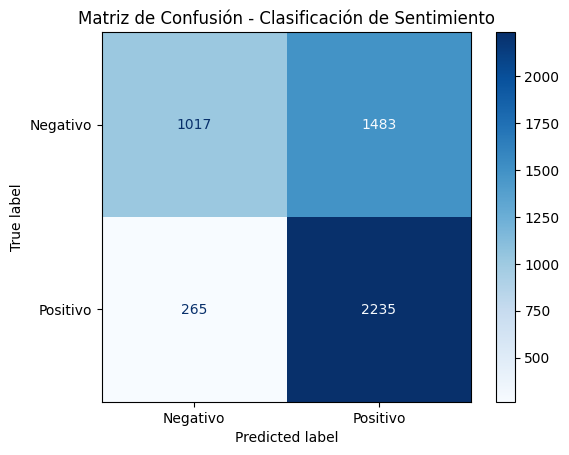

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Variables verdaderas y predichas
y_true = textblob_data['sentimiento']
y_pred = textblob_data['Etiqueta de sentimiento']

# Generar matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Imprimir la matriz de confusión en formato numérico
print("Matriz de Confusión:")
print(cm)

# Crear la visualización de la matriz de confusión con etiquetas y título
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negativo', 'Positivo'])

# Configurar el título y mostrar la gráfica
cm_display.plot(cmap='Blues')  # Usar un mapa de colores para facilitar la visualización
plt.title("Matriz de Confusión - Clasificación de Sentimiento")
plt.show()


la matriz de confucion muestra baja clasificacion se la clase negativa lo que es dificil reconocer una opinion negativa

In [ ]:
# Reporte de Clasificación
from sklearn.metrics import classification_report
print(classification_report(textblob_data['sentimiento'], textblob_data['Etiqueta de sentimiento']))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54      2500
           1       0.60      0.89      0.72      2500

    accuracy                           0.65      5000
   macro avg       0.70      0.65      0.63      5000
weighted avg       0.70      0.65      0.63      5000



##analisis de sentientos usando vader

In [ ]:
## se importan las librerías necesarias para implementar el análisis de sentimientos
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad

# crearemos una copia del dataset depurado para su operación con Vader de NLTK
vader_data =df_depurado.copy()

# mostrar primeros registros del dataset
vader_data.head()

,texto,sentimiento
0,basic famili littl boy jake think zombi closet...,negative
1,show amaz fresh innov idea first air first yea...,negative
2,encourag posit comment film look forward watch...,negative
3,phil alien one quirki film humour base around ...,negative
4,saw movi came recal scariest scene big bird ea...,negative


In [ ]:
!pip install vaderSentiment

# Importar la clase SentimentIntensityAnalyzer desde Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

# Crear una instancia de la clase SentimentIntensityAnalyzer
analizador_sentimiento = SIA()

# Definir las etiquetas para los tipos de sentimiento
etiquetas_sentimiento = ['positivo', 'negativo', 'neutral']

# Calcular el puntaje de polaridad para cada texto en los datos usando .polarity_scores()
# polarity_scores devuelve un diccionario con puntajes de sentimiento para cada texto.
sentimientos = [analizador_sentimiento.polarity_scores(texto) for texto in vader_data['texto'].values]

# Mostrar los primeros 10 registros de los puntajes de sentimientos
sentimientos[:10]


[{'neg': 0.166, 'neu': 0.695, 'pos': 0.139, 'compound': -0.7425},
 {'neg': 0.153, 'neu': 0.629, 'pos': 0.219, 'compound': 0.7863},
 {'neg': 0.181, 'neu': 0.69, 'pos': 0.129, 'compound': -0.6249},
 {'neg': 0.181, 'neu': 0.605, 'pos': 0.214, 'compound': 0.5389},
 {'neg': 0.124, 'neu': 0.698, 'pos': 0.178, 'compound': 0.7096},
 {'neg': 0.115, 'neu': 0.704, 'pos': 0.182, 'compound': 0.936},
 {'neg': 0.153, 'neu': 0.712, 'pos': 0.134, 'compound': -0.3395},
 {'neg': 0.059, 'neu': 0.766, 'pos': 0.175, 'compound': 0.8658},
 {'neg': 0.263, 'neu': 0.701, 'pos': 0.036, 'compound': -0.988},
 {'neg': 0.096, 'neu': 0.691, 'pos': 0.213, 'compound': 0.836}]

In [ ]:
# Crearemos cuatro columnas en el dataset para almacenar los cuatro valores obtenidos con Vader
vader_data['Puntaje negativo']=[i['neg'] for i in sentimientos]
vader_data['Puntaje positivo']=[i['pos'] for i in sentimientos]
vader_data['Puntaje neutral']=[i['neu'] for i in sentimientos]
vader_data['Puntaje Total']=[i['compound'] for i in sentimientos]

vader_data.head()

,texto,sentimiento,Puntaje negativo,Puntaje positivo,Puntaje neutral,Puntaje Total
0,basic famili littl boy jake think zombi closet...,negative,0.166,0.139,0.695,-0.7425
1,show amaz fresh innov idea first air first yea...,negative,0.153,0.219,0.629,0.7863
2,encourag posit comment film look forward watch...,negative,0.181,0.129,0.690,-0.6249
3,phil alien one quirki film humour base around ...,negative,0.181,0.214,0.605,0.5389
4,saw movi came recal scariest scene big bird ea...,negative,0.124,0.178,0.698,0.7096


In [ ]:
# Crear columna con valores del Puntaje Total
score = vader_data['Puntaje Total'].values


# Condiciones para clasificar los puntajes
condiciones = [
    (score <= -0.05),
    (score <= 0.05)
]

# Lista de las etiquetas correspondientes a cada condición
etiquetas = ['negativo','neutral' ]

# Aplicar las condiciones y etiquetas, usando 'Positiva' como valor por defecto
vader_data['Etiqueta'] = np.select(condiciones, etiquetas, default='positivo')

# Visualizar una muestra de 10 registros aleatorios del dataset
print(vader_data.sample(10))


                                                  texto sentimiento  \
899   never seen comedi much chore sit thru one laug...    negative   
1863  someth strang happen loch ness water crystal c...    negative   
4657  one crazi summer fun quirki look love eye hoop...    positive   
1965  movi plain bad even worth watch make fun lunat...    negative   
2720  read review found comparison movi v real life ...    positive   
3102  film like crossfir put anoth film spread aroun...    positive   
1478  think would probabl hate movi spoke polish sel...    negative   
2797  like thought anoth crocodil movi far primev ro...    positive   
1786  difficult precis put word sheer aw film entir ...    negative   
4840  rememb see one theatr came idea go pleasantli ...    positive   

      Puntaje negativo  Puntaje positivo  Puntaje neutral  Puntaje Total  \
899              0.129             0.251            0.619         0.6908   
1863             0.141             0.170            0.689         

In [ ]:
# mostrar conteo de valores diferentes en la columna "Etiqueta"
vader_data['Etiqueta'].value_counts()

,count
Etiqueta,
positivo,3370
negativo,1575
neutral,55


In [ ]:
import plotly.express as px

# Graficar la distribución del Puntaje Total con colores por etiqueta de sentimiento
fig = px.histogram(
    data_frame=vader_data,
    x='Puntaje Total',
    color='Etiqueta',
    title='Distribución del Puntaje Total de Sentimientos',
    labels={'Puntaje Total': 'Puntaje Total', 'count': 'Frecuencia'},
    template='plotly',
    marginal='rug',  # Agregar un gráfico marginal para observar la distribución más claramente
    opacity=0.75  # Ajustar la opacidad de las barras para mejorar la visibilidad
)

# Mostrar la gráfica
fig.show()


la grafica de histograma muestra que hay un sesgo a de derecha en las puntuaciaciones negativas y un sesgo a la izquierda en las puntuaciones positivas luego las polaridades se acumulan en -1 para las negativas y 1 para la positivas, por tanto una buena distribucion de la polaridades es un aquella que solo tenga una cola como la exponencial

##Evaluación de los analisis de sentimiento usando vader

In [ ]:
# binarizar categorías presentes en las etuetas originales y de Vader en el dataset
vader_data['sentimiento'].replace({'positive':1,'negative':0},inplace = True)
vader_data['Etiqueta'].replace({'positivo':1,'negativo':0, 'neutral':1},inplace = True)

# mostrar primeros registros del dataset
vader_data.head()

<ipython-input-38-b291cb00a51b>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,texto,sentimiento,Puntaje negativo,Puntaje positivo,Puntaje neutral,Puntaje Total,Etiqueta
0,basic famili littl boy jake think zombi closet...,0,0.166,0.139,0.695,-0.7425,0
1,show amaz fresh innov idea first air first yea...,0,0.153,0.219,0.629,0.7863,1
2,encourag posit comment film look forward watch...,0,0.181,0.129,0.690,-0.6249,0
3,phil alien one quirki film humour base around ...,0,0.181,0.214,0.605,0.5389,1
4,saw movi came recal scariest scene big bird ea...,0,0.124,0.178,0.698,0.7096,1


In [ ]:
# importar función accuracy_score del modulo sklearn.metrics
from sklearn.metrics import accuracy_score

# implementar métrica entre los valores originales y las obtenidas con vader
accuracy_score(vader_data['sentimiento'], vader_data['Etiqueta'])*100

66.08000000000001

[[1217 1283]
 [ 413 2087]]


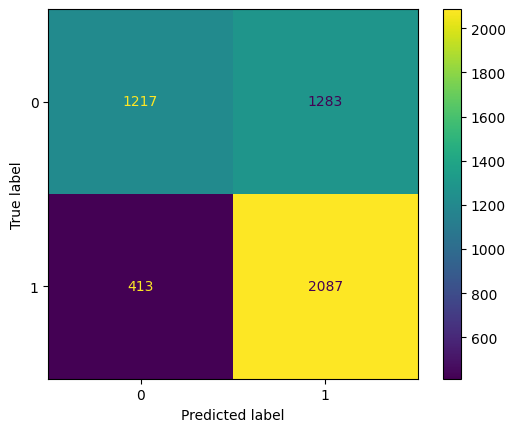

In [ ]:
# del modulo sklearn.metrics importar la función confusion_matrix
from sklearn.metrics import confusion_matrix

# definir valores originales (reales) y valores predichos (obtenidos con Vader)
y_true = vader_data['sentimiento']
y_pred = vader_data['Etiqueta']

# Crear y mostrar la matríz de confusión
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# graficar la matríz de confusión mediante un heatmap
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(vader_data['sentimiento'], vader_data['Etiqueta']))

              precision    recall  f1-score   support

           0       0.75      0.49      0.59      2500
           1       0.62      0.83      0.71      2500

    accuracy                           0.66      5000
   macro avg       0.68      0.66      0.65      5000
weighted avg       0.68      0.66      0.65      5000



#Analisis de sentimientos usando Naive Bayes

In [ ]:
# Crearemos una copia del dataset depurado para su trabajo en este apartado
nv_data=df_depurado.copy()

# mostrar dataframe
nv_data.head()

,texto,sentimiento
0,basic famili littl boy jake think zombi closet...,negative
1,show amaz fresh innov idea first air first yea...,negative
2,encourag posit comment film look forward watch...,negative
3,phil alien one quirki film humour base around ...,negative
4,saw movi came recal scariest scene big bird ea...,negative


In [ ]:
# se selcciona los valores del corpues y se transcribe en un vector "X" )
X = nv_data.iloc[:,0:1].values

# mostrar dimensión de "X"
print("corpus compuesto de  5.000 registros y 1 columna", X.shape)

corpus compuesto de  5.000 registros y 1 columna (5000, 1)


In [ ]:
# del modulo sklearn.feature_extraction.text importar la función CountVectorizer
# Convierte una colección de documentos de texto en una matriz de recuentos de tokens.
from sklearn.feature_extraction.text import CountVectorizer

# crear instancia para aplicar función (máximo de características = 2000)
cv  = CountVectorizer(max_features = 2000)

# mediante el objeto "X" aplicaremos la trasformación del corpus
X = cv.fit_transform(nv_data['texto']).toarray()
X[:1]
# Visualizar las palabras más frecuentes seleccionadas por CountVectorizer
tokens = cv.get_feature_names_out()
print("\nCaracterísticas seleccionadas (primeros 20 tokens):")
print(tokens[:20])


Características seleccionadas (primeros 20 tokens):
['abandon' 'abil' 'abl' 'absolut' 'absurd' 'abus' 'academi' 'accent'
 'accept' 'accid' 'accident' 'accompani' 'accord' 'account' 'accur'
 'achiev' 'across' 'act' 'action' 'activ']


In [ ]:
# dimensión de X
X.shape

(5000, 2000)

In [ ]:
# definir eje y para dividir el set para entrenamiento y prueba
y = nv_data.iloc[:,-1].values
y[:10]

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

##modelo de entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split

# dividir el dataframe en set de entrenamiento y set de prueba
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 2000)
(1000, 2000)
(4000,)
(1000,)


## aplicacin de modelos Naive bayes
se aplico el modelo multinomial y ademas se aplico el modelo **Complement Naive Bayes**por que este, está diseñado para trabajar mejor con clases desbalanceadas. Mientras que MultinomialNB asume que las características son independientes y distribuidas de forma idéntica, ComplementNB ajusta los pesos de las clases para contrarrestar el desbalance, lo que lo hace más adecuado cuando las polaridades o la distribución de clases no son simétricas. se realizo este ajuste dado que las clases de polaridades no estaban balanceadas ademas al aplicar los modelo anteriores

In [ ]:
from sklearn.naive_bayes import ComplementNB, MultinomialNB

# crear instancia para implementar algortimos Naive Bayes
clf1 = ComplementNB()
clf2 = MultinomialNB()

In [ ]:
# Entrenar modelos
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

MultinomialNB()

In [ ]:
#se crea predicciones
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
# visualizar resultados de predicción de los modelos
print(y_pred1[:20])
print(y_pred2[:20])

['negative' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive']
['negative' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive']


In [ ]:
# crear predicciones
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

# visualizar resultados de predicción de los modelos
print(y_pred1[:20])
print(y_pred2[:20])

['negative' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive']
['negative' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'positive']


In [ ]:
# importar función accuracy_score del modulo sklearn.metrics
from sklearn.metrics import accuracy_score

# aplicar métrica de evaluación a los modelos
print('Accuracy score of ComplemtNB',accuracy_score(y_test,y_pred1)*100)
print('Accuracy score of MultinomialNB',accuracy_score(y_test,y_pred2)*100)

Accuracy score of ComplemtNB 83.3
Accuracy score of MultinomialNB 83.3


[[425  81]
 [ 86 408]]


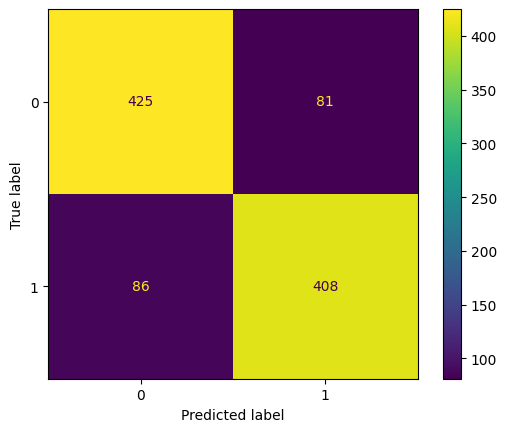

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_pred1
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = clf1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

    negative       0.83      0.84      0.84       506
    positive       0.83      0.83      0.83       494

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



[[425  81]
 [ 86 408]]


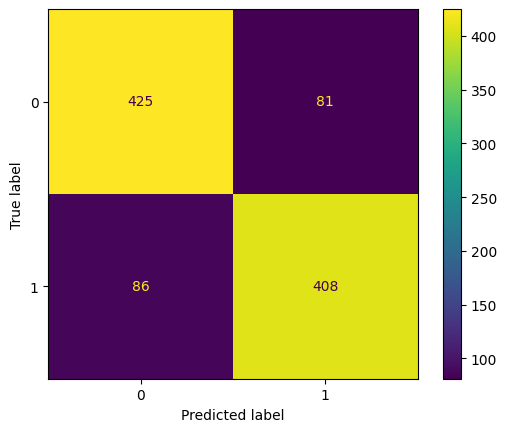

In [ ]:
# crear y mostrar matriz de confusión
y_true = y_test
y_pred = y_pred2
confusion_matrix(y_true, y_pred)
print(confusion_matrix(y_true, y_pred))

# Crear Grafica de la matríz
y_pred = clf2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
# del modulo sklearn.metrics importar la función classification_report
from sklearn.metrics import classification_report

# crear y mostrar el reporte de clasificación
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    negative       0.83      0.84      0.84       506
    positive       0.83      0.83      0.83       494

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



## validacion cruzada
dado el presición se usara valizacion cruzada con el modelo de naive bayes Complement

Scores de validación cruzada en cada fold: [0.836 0.835 0.821 0.826 0.837]
Promedio de exactitud: 83.10000000000001 %
Desviación estándar de los scores: 0.6356099432828287 %
Exactitud en el conjunto de prueba: 83.30%
Matriz de confusión:
 [[425  81]
 [ 86 408]]
Reporte de clasificación:
               precision    recall  f1-score   support

    negative       0.83      0.84      0.84       506
    positive       0.83      0.83      0.83       494

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



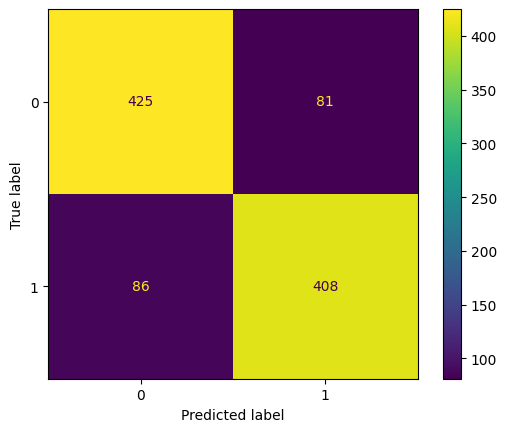

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Crear una instancia del modelo Naive Bayes (ComplementNB)
clf1 = ComplementNB()

# Aplicar validación cruzada con 5 divisiones (folds)
# cross_val_score devuelve el puntaje de exactitud para cada fold
scores = cross_val_score(clf1, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados de validación cruzada
print("Scores de validación cruzada en cada fold:", scores)
print("Promedio de exactitud:", np.mean(scores) * 100, "%")
print("Desviación estándar de los scores:", np.std(scores) * 100, "%")

# Ajustar el modelo con todo el conjunto de entrenamiento para hacer predicciones finales
clf1.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred1 = clf1.predict(X_test)

# Calcular y mostrar la exactitud en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred1)
print(f'Exactitud en el conjunto de prueba: {accuracy * 100:.2f}%')

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred1)
print("Matriz de confusión:\n", cm)

# Visualizar la matriz de confusión
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Mostrar el reporte de clasificación
print("Reporte de clasificación:\n", classification_report(y_test, y_pred1))


se observa que no existe rendimiento usando la validación cruzada
